Contour-based descriptors:
Perimeter: 2249.67948281765
Aspect Ratio: 0.7875
Solidity: 0.6606983540993693
Eccentricity: 0.275206348250087

Region-based descriptors:
Centroid: (108, 104)
Extent: 0.5326388888888889


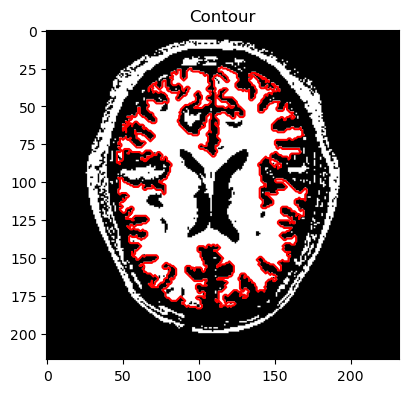

In [4]:
import cv2
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt

# Load the MRI image and convert to grayscale
image_path = 'F:/Brain Tumor Detection/Dataset/brain_tumor_dataset/no/no1482.jpg'  # Path to your MRI image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply a threshold to create a binary image
_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Find contours of the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming the largest contour corresponds to the brain region
contour = max(contours, key=cv2.contourArea)

# Contour-based shape descriptors
perimeter = cv2.arcLength(contour, True)  # Perimeter of the contour
x, y, w, h = cv2.boundingRect(contour)
aspect_ratio = float(w) / h  # Aspect Ratio
area_contour = cv2.contourArea(contour)
hull = cv2.convexHull(contour)
hull_area = cv2.contourArea(hull)
solidity = float(area_contour) / hull_area  # Solidity

# Region-based shape descriptors
M = cv2.moments(contour)
centroid_x = int(M['m10'] / M['m00'])
centroid_y = int(M['m01'] / M['m00'])
extent = area_contour / (w * h)  # Extent

# Skimage for region properties (eccentricity)
label_image = measure.label(thresh)
regions = measure.regionprops(label_image)
eccentricity = regions[0].eccentricity if len(regions) > 0 else 0

# Print out the descriptors
print(f"Contour-based descriptors:")
print(f"Perimeter: {perimeter}")
print(f"Aspect Ratio: {aspect_ratio}")
print(f"Solidity: {solidity}")
print(f"Eccentricity: {eccentricity}")

print(f"\nRegion-based descriptors:")
print(f"Centroid: ({centroid_x}, {centroid_y})")
print(f"Extent: {extent}")

# Plot the results
plt.figure(figsize=(10, 5))
#plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(thresh, cmap='gray'), plt.plot(contour[:, :, 0], contour[:, :, 1], 'r'), plt.title('Contour')
plt.show()
